### `Chapter 5: Specific small trajectory`
In this chapter we are comparing the overal average of the A4 with a more specific part of the A4. To determine which part we use we 
sort the 2019 data by intensities and taking a look at the morning rush hour and evening rush hour:

In [18]:
selected_columns = data[[ 'Wegnr_van','Wegnr_naar','Hm_van','Hm_naar','Traject_van', 'Traject_naar', 'etmaal_AL', 'OS_AL',
                          'AS_AL','Ri_naar' , 'Baantype_naar', 'Baantype_van']].copy()

selected_columns['Hm_van'] = pd.to_numeric(selected_columns['Hm_van'], errors='coerce')

selected_columns.loc[:, 'Traject'] = data['Traject_van'].astype(str) + ' ' + data['Traject_naar'].astype(str) + ' ' + data['Ri_naar'].astype(str)
selected_columns.loc[:, 'HM'] = data['Hm_van'].astype(str) + ' ' + data['Hm_naar'].astype(str)

df_road_4 = selected_columns[ (selected_columns['Wegnr_van'] == 4) & (selected_columns['Wegnr_naar'] == 4) & 
                             (selected_columns['Baantype_naar'] == 'HR') & (selected_columns['Baantype_van'] == 'HR') & 
                              (selected_columns['Ri_naar'] == 'R') & (selected_columns['Hm_van'] <= 150000) ] 

df_road_4_sorted = df_road_4.sort_values(by='AS_AL', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(df_road_4_sorted['Traject'].head(10), df_road_4_sorted['AS_AL'].head(10), color='skyblue')
plt.xlabel('Traffic Volume (AS_AL)')
plt.ylabel('Road Segments')
plt.title('Top 10 Road Segments with Highest Traffic Volume during evening rush hour on Right side of Road 4')
plt.gca().invert_yaxis()

plt.show()

plt.figure(figsize=(10,6))
plt.barh(df_road_4_sorted['Traject'].head(10), df_road_4_sorted['OS_AL'].head(10), color='skyblue')
plt.xlabel('Traffic Volume (OS_AL)')
plt.ylabel('Road Segments')
plt.title('Top 10 Road Segments with Highest Traffic Volume during morning rush hour on Left side of Road 4')
plt.gca().invert_yaxis()

plt.show()

NameError: name 'data' is not defined

It shows 3 segments which are consecutive near Nieuw Vennep and around Den Ruygen Hoek. After doing some more research it is a trajectory
between hectometer 11500 and 17500 which is shown in the image below:

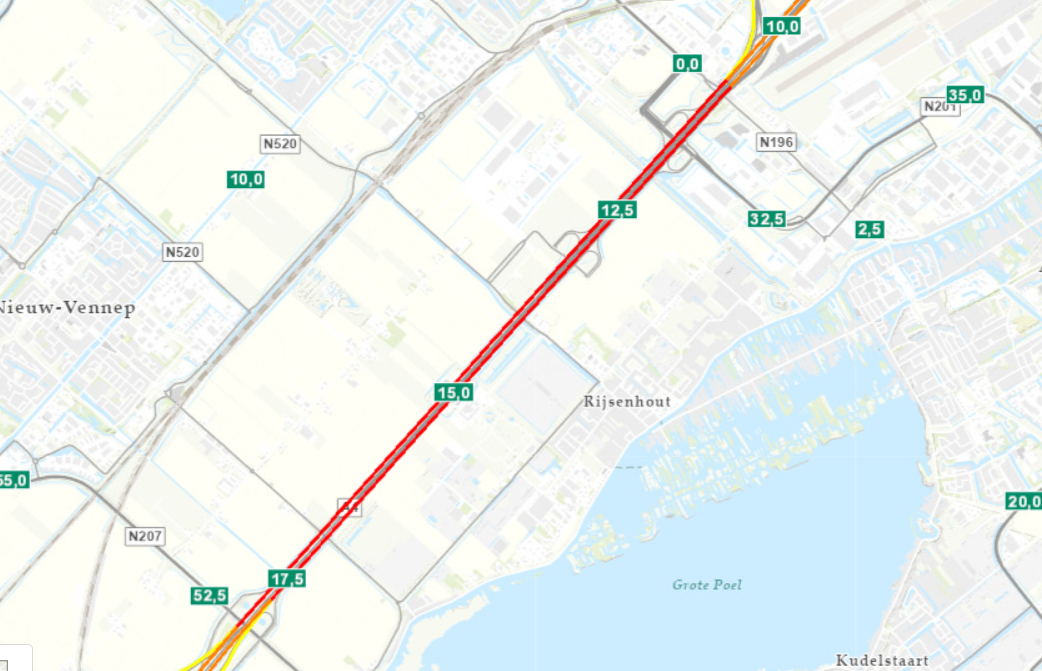

Now we only going to look at the average intensities on this specific trajectory Extrapolating the data from this specific trajectory between 2016 and 2019 all to way op to 2023 compared with the real data shows:

In [30]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data_files_extended = {
    2016: 'datasets_spitsuren_wegvakken/INWEVA_2016_spits.xlsx',
    2017: 'datasets_spitsuren_wegvakken/INWEVA_2017_spits.xlsx',
    2018: 'datasets_spitsuren_wegvakken/INWEVA_2018_spits.xlsx',
    2019: 'datasets_spitsuren_wegvakken/INWEVA_2019_spits.xlsx',
    2020: 'datasets_spitsuren_wegvakken/INWEVA_2020_spits.xlsx',
    2021: 'datasets_spitsuren_wegvakken/INWEVA_2021_spits.xlsx',
    2022: 'datasets_spitsuren_wegvakken/INWEVA_2022_spits.xlsx',
    2023: 'datasets_spitsuren_wegvakken/INWEVA_2023_spits.xlsx',
}

# selecting data from the specific trajectory and place into one list
results_extended = []

for year, file in data_files_extended.items():
    df = pd.read_excel(file)
    
    df_road_4HR = df[(df['Wegnr_van'] == 4) & (df["Wegnr_naar"] == 4) & (df['Baantype_naar'] == 'HR') & (df['Baantype_van'] == 'HR')]
    df_road_4HR_HM = df_road_4HR[(df_road_4HR['Hm_van']<= 17500)& (df_road_4HR['Hm_van']>= 11500)
                              & (df_road_4HR['Hm_naar']>= 11500)& (df_road_4HR['Hm_naar']<= 17500)]
    
    df_road_4HR_HM_R = df_road_4HR_HM[(df_road_4HR_HM['Ri_van'] == 'R') & (df_road_4HR_HM['Ri_naar'] == 'R')]
    df_road_4HR_HM_L = df_road_4HR_HM[(df_road_4HR_HM['Ri_van'] == 'L') & (df_road_4HR_HM['Ri_naar'] == 'L')]
    
    mean_score_R_OS_R = df_road_4HR_HM_R['OS_AL'].mean()
    mean_score_R_AS_R = df_road_4HR_HM_R['AS_AL'].mean()
    mean_score_R_OS_L = df_road_4HR_HM_L['OS_AL'].mean()
    mean_score_R_AS_L = df_road_4HR_HM_L['AS_AL'].mean()
    
    results_extended.append({'Year': year, 'Rush': 'Morning', 'Direction': 'R', 'Mean Score': mean_score_R_OS_R})
    results_extended.append({'Year': year, 'Rush': 'Afternoon', 'Direction': 'R', 'Mean Score': mean_score_R_AS_R})
    results_extended.append({'Year': year, 'Rush': 'Morning', 'Direction': 'L', 'Mean Score': mean_score_R_OS_L})
    results_extended.append({'Year': year, 'Rush': 'Afternoon', 'Direction': 'L', 'Mean Score': mean_score_R_AS_L})

df_extended = pd.DataFrame(results_extended) # all the dataconvert into pandas

df_recent = df_extended[(df_extended['Year'] >= 2016) & (df_extended['Year'] <= 2019)] # data used for the linear regression

In [1]:
years16_19 = df_recent['Year'].unique().reshape(-1, 1)  
all_years = np.arange(2016, 2024).reshape(-1, 1) 
plt.figure(figsize=(17, 11))

color_mapping_real = {  ('Morning', 'R'): 'skyblue',
                        ('Afternoon', 'R'): 'coral',
                        ('Morning', 'L'): 'darkgreen',  
                        ('Afternoon', 'L'): 'orchid'    }

color_mapping_expected = {  ('Morning', 'R'): 'lightblue',
                            ('Afternoon', 'R'): 'lightcoral',
                            ('Morning', 'L'): 'lightgreen',
                            ('Afternoon', 'L'): 'thistle'   }

for rush in ['Morning', 'Afternoon']:
    for direction in ['R', 'L']:

        #real data points

        df_extended_filtered = df_extended[(df_extended['Rush'] == rush) & (df_extended['Direction'] == direction)]
        
        plt.plot(df_extended_filtered['Year'], df_extended_filtered['Mean Score'], 
                 label=f'{rush} Rush {direction} (Actual 2016-2023)', 
                 color=color_mapping_real[(rush, direction)], marker='o')
        
        #lineair regression line
        df_recent_filtered = df_recent[(df_recent['Rush'] == rush) & (df_recent['Direction'] == direction)]
        mean_scores = df_recent_filtered['Mean Score'].values
        reg = LinearRegression().fit(years16_19, mean_scores)
        predicted_scores = reg.predict(all_years)

        plt.plot(all_years, predicted_scores, linestyle='--', 
                 label=f'{rush} Rush {direction} (Regression)', 
                 color=color_mapping_expected[(rush, direction)])        
    

plt.title('Mean morning (07:00-09:00) and afternoon (16:00-18:00) rush hour intensity on specific trajectory (2016-2023) with Linear Regression and Real Data')
plt.xlabel('Year')
plt.ylabel('Intensity [vehicles]')
plt.legend(loc='lower left')

plt.grid(True)
plt.tight_layout()
plt.show()


NameError: name 'df_recent' is not defined

## Conclusion


Comparing these results of a specific trajectory of the A4 with the overal intensities of the A4 has some interesting results. 

First of all can be seen that the trend lines and data are much more accurate. The trendlines have roughly the same slope, much different than for the hole A4. The trendlines being much more accurate makes it more reliable to make conclusions about the data. 

Another difference is that the intensity levels of 2023 were not on the same level of pre-covid year 2019. This is different than the overall intensities because there you saw that on the right side of the A4 the intensities were already higher than pre covid-trend line.

Only the afternoon Rush Right line (orange) has a small decline. However seen in the data, this is mostly because of 2016 data. A specific reason for this 2016 peak is not found. However it is likely that after 2016 a new road was introduced or adapted which causes a small shift in the hole system. 

The after-covid traffic intensities not corresponding with the pre-covid trendlines confirms research about the increase of home working hours (*TNO,* n.d.). This research tells that since covid, when people were forced to work from home, people are still working more from home. This explains the difference.
